In [1]:
import pandas as pd
import numpy as np
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load modified file with some pre-processing completed
df = pd.read_csv("diabetes_data_preprocessed.csv", index_col=0)
df.shape

(100120, 54)

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,0,0,0,1,1,1,1,1,0,0
age,1,2,3,4,5,6,7,8,9,10
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,18,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [4]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [5]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [6]:
L1 = np.random.randint(1,10, 20)
L2 = np.random.randint(1,20, 20)

datframe = pd.DataFrame()
datframe['L1'] = L1
datframe['L2'] = L2

In [7]:
datframe.corr()

,L1,L2
L1,1.000000,0.304967
L2,0.304967,1.000000


In [8]:
scaler = MinMaxScaler()
datframe = pd.DataFrame(scaler.fit_transform(datframe), columns = ['L1', 'L2'])
datframe.corr()

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,L1,L2
L1,1.000000,0.304967
L2,0.304967,1.000000


In [9]:
"""
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as
the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes
interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that
information by treating it as a simple categorical variable.
"""

# convert age back to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [10]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [11]:
num_col

['number_inpatient',
 'number_outpatient',
 'numchange',
 'num_procedures',
 'nummed',
 'service_utilization',
 'age',
 'number_emergency',
 'time_in_hospital',
 'number_diagnoses',
 'num_medications',
 'num_lab_procedures']

In [12]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [13]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_inpatient,3.626402,20.833542,1.261825,Yes,log1p,1.450492,1.405364,0.510433
1,number_outpatient,8.818291,148.558544,1.263973,Yes,log1p,2.733914,7.804218,0.429394
2,numchange,1.425310,1.433619,0.487858,No,NA,1.425310,1.433619,0.487858
3,num_procedures,1.326020,0.890773,1.700335,No,NA,1.326020,0.890773,1.700335
4,nummed,0.675116,0.277244,0.921620,No,NA,0.675116,0.277244,0.921620
5,service_utilization,5.334724,67.779770,2.292730,Yes,log1p,1.119136,0.547353,0.662373
6,age,-0.626715,0.274302,15.947496,No,NA,-0.626715,0.274302,15.947496
7,number_emergency,22.842251,1185.246374,0.935517,Yes,log1p,3.661064,16.276610,0.315405
8,time_in_hospital,1.137931,0.871189,2.974528,No,NA,1.137931,0.871189,2.974528
9,number_diagnoses,-0.867785,-0.109005,1.938211,No,NA,-0.867785,-0.109005,1.938211


In [14]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [15]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [16]:
df.shape

(100120, 54)

In [17]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [18]:
numerics

['number_emergency_log1p',
 'numchange',
 'num_procedures',
 'nummed',
 'age',
 'time_in_hospital',
 'number_diagnoses',
 'num_medications',
 'service_utilization_log1p',
 'number_outpatient_log1p',
 'num_lab_procedures',
 'number_inpatient_log1p']

In [19]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                            int64
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [20]:
df.A1Cresult.value_counts()

-99    83243
 1     11935
 0      4942
Name: A1Cresult, dtype: int64

In [21]:
dfcopy = df.copy(deep = True)

In [22]:
df = dfcopy.copy(deep = True)

In [23]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [24]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [25]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,change,diabetesMed,readmitted,numchange,nummed,level1_diag1,number_inpatient_log1p,number_outpatient_log1p,service_utilization_log1p,number_emergency_log1p
0,2278392,8222157,Caucasian,0,5,5,18,1,1,41,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,1,0,1,1,0,0.0,0.0,0.0,0.0


In [26]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [27]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [28]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


### Scaling applied to df; using df2 from here

In [29]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [30]:
# Logical order: duplicate removal, then outlier removal followed by scaling

In [31]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 55)

In [32]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [33]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [35]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
# table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [36]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(2304,)


glipizide                            glipizide                              1.000000
glyburide                            glyburide                              1.000000
tolbutamide                          tolbutamide                            1.000000
pioglitazone                         pioglitazone                           1.000000
rosiglitazone                        rosiglitazone                          1.000000
acarbose                             acarbose                               1.000000
change|num_medications               change|num_medications                 1.000000
encounter_id                         encounter_id                           1.000000
time_in_hospital                     number_diagnoses|time_in_hospital      0.935819
number_diagnoses|time_in_hospital    time_in_hospital                       0.935819
numchange                            num_medications|numchange              0.899794
num_medications|numchange            numchange                   

In [37]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)

In [38]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [39]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['acetohexamide',
 'change|num_medications',
 'repaglinide',
 'glimepiride',
 'acarbose',
 'tolazamide',
 'num_medications|num_lab_procedures',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'nummed',
 'num_medications|num_procedures',
 'A1Cresult',
 'num_medications|time_in_hospital',
 'miglitol',
 'num_lab_procedures',
 'metformin',
 'number_outpatient_log1p',
 'time_in_hospital|num_lab_procedures',
 'number_emergency_log1p',
 'troglitazone',
 'glyburide-metformin',
 'num_procedures',
 'insulin',
 'encounter_id',
 'age',
 'chlorpropamide',
 'tolbutamide',
 'glipizide-metformin',
 'number_diagnoses',
 'glyburide',
 'nateglinide',
 'age|number_diagnoses',
 'pioglitazone',
 'patient_nbr',
 'diabetesMed',
 'service_utilization_log1p',
 'num_medications|numchange',
 'number_inpatient_log1p',
 'num_medications|number_diagnoses',
 'rosiglitazone',
 'numchange',
 'number_diagnoses|time_in_hospital',
 'metformin-pioglitazone',
 'time_in_hospital',
 'num_medications',
 'glipizide']

In [40]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [41]:
new_non_num_cols

['race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [42]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

### Modeling

In [43]:
feature_set_1 = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [44]:
feature_set_2 = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'service_utilization_log1p', 
                 'number_diagnoses', 'nummed', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
                 'race_Other', 'gender_1', 'A1Cresult_0', 'A1Cresult_1', 'admission_type_id_3', 'admission_type_id_4',
                 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_8', 'admission_source_id_9', 'admission_source_id_11',
                 'numchange', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0', 'level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

## Applying Feature Set 1 (detailed)

In [45]:
train_input = df_pd[feature_set_1]
train_output = df_pd['readmitted']

In [46]:
df_pd['readmitted'].value_counts()

0    56476
1     5199
Name: readmitted, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 91.67%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 91.16%


In [48]:
Y_dev_predict = logreg.predict(X_dev)

In [49]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1580,1580
1,157,157
All,1737,1737


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [54]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 61.85%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 61.34%


In [56]:
Y_dev_predict = logreg.predict(X_dev)

In [57]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7666,3602,11268
1,5131,6192,11323
All,12797,9794,22591


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.61
Precision is 0.63
Recall is 0.55
AUC is 0.61


In [59]:
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)

result = logit.fit()

# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())
logit_coefs = pd.DataFrame(result.params)
logit_coefs.reset_index(inplace=True)
logit_coefs.columns = ["Feature", "Coefficient"]
logit_pvals = pd.DataFrame(result.pvalues)
logit_pvals.reset_index(inplace=True)
logit_pvals.columns = ["Feature", "pVal"]

logit_coefs = logit_coefs.merge(logit_pvals, how="inner", on=["Feature"])
logit_coefs = logit_coefs[logit_coefs.pVal <0.01]
logit_coefs.sort_values(by='Coefficient', ascending=False)

Optimization terminated successfully.
         Current function value: 0.662567
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                90361
Model:                          Logit   Df Residuals:                    90304
Method:                           MLE   Df Model:                           56
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                 0.04412
Time:                        02:00:42   Log-Likelihood:                -59870.
converged:                       True   LL-Null:                       -62633.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.2464      0.020 

,Feature,Coefficient,pVal
31,discharge_disposition_id_10,2.238643,4.363261e-16
29,discharge_disposition_id_2,0.875221,0.000000e+00
9,repaglinide,0.549297,1.104221e-17
30,discharge_disposition_id_7,0.459875,1.909717e-06
32,discharge_disposition_id_18,0.358401,2.623467e-24
21,race_AfricanAmerican,0.305845,1.350213e-10
7,number_diagnoses,0.270224,4.920229e-58
0,age,0.246429,1.545453e-36
23,race_Caucasian,0.241778,9.283249e-08
6,number_inpatient_log1p,0.239786,9.574255e-102


## Decision Tree classifier for Q2 (Complex model)

In [60]:
feature_set_1_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 
                 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

feature_set_2_no_int = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'service_utilization_log1p', 
                 'number_diagnoses', 'nummed', 'race_AfricanAmerican', 'race_Asian', 
                 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_8', 
                 'admission_source_id_9', 'admission_source_id_11', 'numchange', 
                 'A1Cresult_0', 'A1Cresult_1',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [61]:
train_input = df_pd[feature_set_1_no_int]
train_output = df_pd['readmitted']
df_pd['readmitted'].value_counts()

0    56476
1     5199
Name: readmitted, dtype: int64

In [62]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [63]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 90.77%
Dev Set score: 91.04%


In [64]:
Y_dev_predict = dte.predict(X_dev)

In [65]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10511,757,11268
1,1268,10055,11323
All,11779,10812,22591


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.93
Recall is 0.89
AUC is 0.91


In [70]:
# Visualizaing decision tree for Question 2 - detailed feature set
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=X_train.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

InvocationException: GraphViz's executables not found

                       Feature  Importance
34       admission_source_id_7    0.015407
26                    gender_1    0.018927
8                    metformin    0.019662
19                     insulin    0.023725
2               num_procedures    0.058071
7             number_diagnoses    0.062039
3              num_medications    0.064036
29  discharge_disposition_id_2    0.083167
0                          age    0.128869
1             time_in_hospital    0.386752


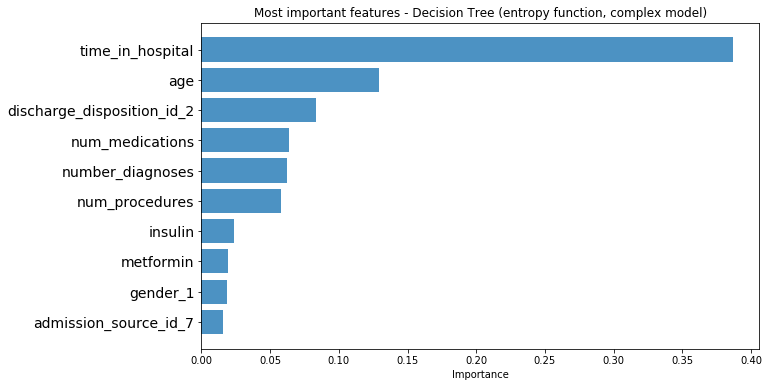

In [69]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy function, complex model)')
plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=10))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 91.00%
Dev Set score: 91.16%


In [72]:
Y_dev_predict = dtg.predict(X_dev)

In [73]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10549,719,11268
1,1277,10046,11323
All,11826,10765,22591


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.93
Recall is 0.89
AUC is 0.91


## Random Forest - Q2 Complex model

In [75]:
train_input = df_pd[feature_set_1_no_int]
train_output = df_pd['readmitted']

# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [76]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.31%
Dev Set score: 93.33%


In [77]:
Y_dev_predict = forrest.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10963,305,11268
1,1202,10121,11323
All,12165,10426,22591


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.93
Precision is 0.97
Recall is 0.89
AUC is 0.93


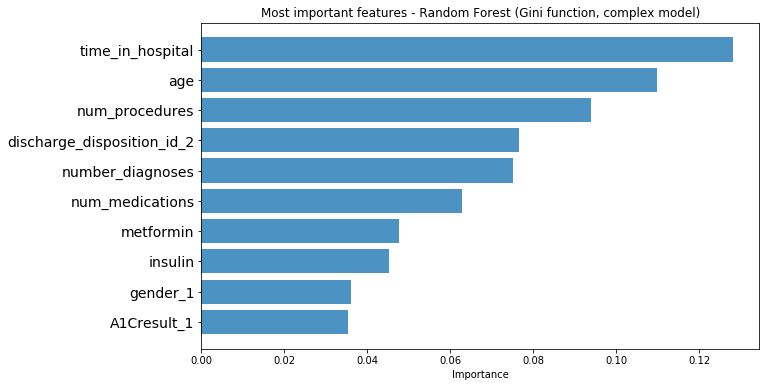

In [79]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (Gini function, complex model)')
plt.show()

In [81]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.13%
Dev Set score: 93.36%


In [82]:
Y_dev_predict = forrest.predict(X_dev)

In [83]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10947,321,11268
1,1178,10145,11323
All,12125,10466,22591


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.93
Precision is 0.97
Recall is 0.90
AUC is 0.93


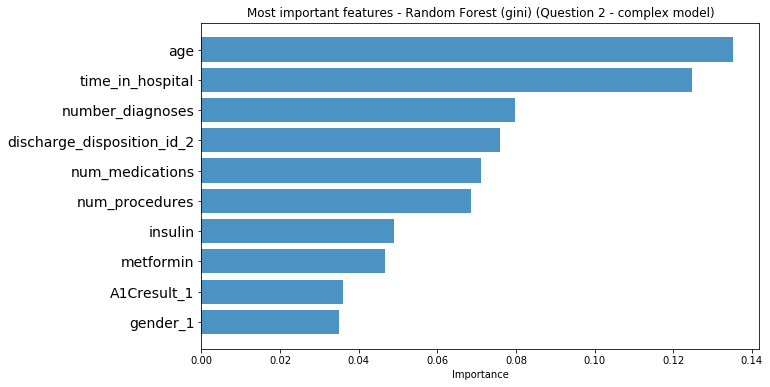

In [85]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (gini) (Question 2 - complex model)')
plt.show()

In [86]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

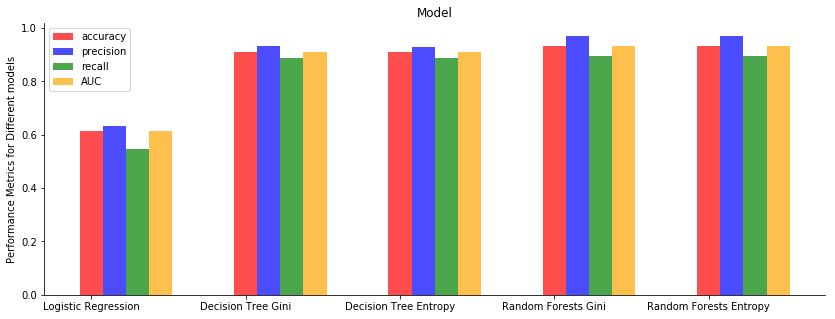

In [87]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [88]:
# coefs = [(x[2], x[1]) for x in sorted(zip(list(np.abs(logreg.coef_[0])), list(logreg.coef_[0]), list(train_input.columns)), reverse = True)]
# print("Logistic Regression Coefficients in decreasing order of coefficient values")
# coefs

In [89]:
impforrest = [(x[1], x[0]) for x in sorted(zip(list(forrest.feature_importances_), list(train_input.columns)), reverse = True)]
print("Random Forest Feature Importance in decreasing order")
impforrest = pd.DataFrame(impforrest, columns=["Feature","Importance"])
impforrest

Random Forest Feature Importance in decreasing order


,Feature,Importance
0,age,0.135159
1,time_in_hospital,0.124649
2,number_diagnoses,0.079636
3,discharge_disposition_id_2,0.076032
4,num_medications,0.071123
5,num_procedures,0.068645
6,insulin,0.048977
7,metformin,0.046791
8,A1Cresult_1,0.035999
9,gender_1,0.035029


In [90]:
coef_imp = logit_coefs.merge(impforrest, how = 'inner', on = ['Feature'])
coef_imp

,Feature,Coefficient,pVal,Importance
0,age,0.246429,1.545453e-36,0.135159
1,time_in_hospital,0.133840,1.365374e-03,0.124649
2,num_procedures,-0.075853,1.180293e-04,0.068645
3,num_medications,-0.222772,8.607993e-09,0.071123
4,number_outpatient_log1p,0.030363,8.640258e-03,0.007509
5,number_emergency_log1p,0.048000,1.338747e-05,0.003891
6,number_inpatient_log1p,0.239786,9.574255e-102,0.006802
7,number_diagnoses,0.270224,4.920229e-58,0.079636
8,repaglinide,0.549297,1.104221e-17,0.003142
9,chlorpropamide,-0.859498,1.713125e-03,0.000094


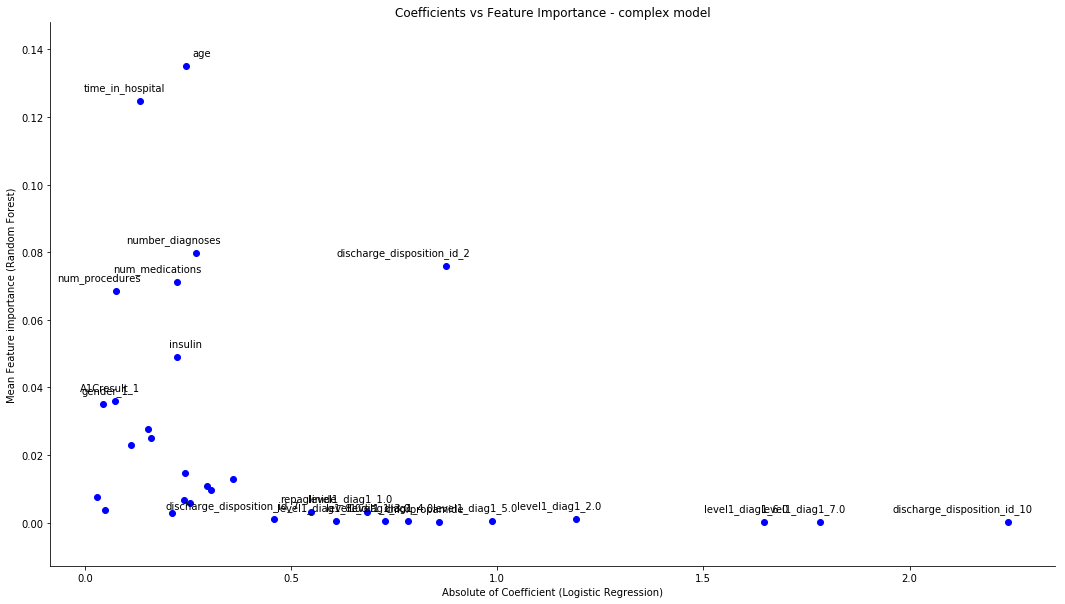

In [91]:
# plotting the absolute values of the coefficients from logistic regression with the feature importance from decision trees
plt.figure(figsize=(18, 10))
ax = plt.subplot(111)
x = coef_imp.Coefficient.abs()
y = coef_imp.Importance
plt.scatter(x, y, color = 'blue')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Absolute of Coefficient (Logistic Regression)")
plt.ylabel("Mean Feature importance (Random Forest)")
plt.title("Coefficients vs Feature Importance - complex model")

for label, m, n in zip(coef_imp.Feature, coef_imp.Coefficient.abs(), coef_imp.Importance):
    if (m>0.4) or (n>0.03):
        plt.annotate(label, xy=(m,n), xytext=(25, 8), textcoords='offset points', ha='right', va='bottom',)
plt.show()

## Feature set 2 - Logistic Regression - Simple model

In [92]:
train_input = df_pd[feature_set_2]
train_output = df_pd['readmitted']

In [93]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [94]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 61.10%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dev Set score: 60.83%


In [96]:
import statsmodels.api as sm
logit2 = sm.Logit(Y_train, X_train)

result2 = logit2.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result2.summary())
logit2_coefs = pd.DataFrame(result2.params)
logit2_coefs.reset_index(level=0, inplace=True)
logit2_coefs.columns = ["Feature", "Coefficient"]
logit2_pvals = pd.DataFrame(result2.pvalues)
logit2_pvals.reset_index(level=0, inplace=True)
logit2_pvals.columns = ["Feature", "pVal"]

logit2_coefs = logit2_coefs.merge(logit2_pvals, how="inner", on=["Feature"])
logit2_coefs = logit2_coefs[logit2_coefs.pVal <0.01]
logit2_coefs

         Current function value: 0.664940
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                90361
Model:                          Logit   Df Residuals:                    90316
Method:                           MLE   Df Model:                           44
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                 0.04069
Time:                        02:11:22   Log-Likelihood:                -60085.
converged:                      False   LL-Null:                       -62633.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.1772      0.018     10.030      0.000       0.143   

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Feature,Coefficient,pVal
0,age,0.177225,1.130097e-23
2,num_lab_procedures,-0.055109,3.533105e-03
3,num_procedures,-0.076968,8.937228e-05
4,service_utilization_log1p,0.187909,5.756094e-65
5,number_diagnoses,0.229912,5.467344e-40
6,nummed,0.075248,1.881688e-11
7,race_AfricanAmerican,0.349042,2.014789e-13
9,race_Caucasian,0.273187,1.470528e-09
10,race_Hispanic,0.264576,1.466920e-04
12,gender_1,0.056894,1.596834e-04


In [97]:
Y_dev_predict = result2.predict(X_dev, linear=False)
Y_dev_predict = (Y_dev_predict > 0.5).astype(int)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1567,714,2281
1,1540,710,2250
All,3107,1424,4531


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.61
Precision is 0.63
Recall is 0.54
AUC is 0.61


## Decision Tree for Q2 - Simple model

In [99]:
# using simple feature set with interaction terms removed for decision tree
train_input = df_pd[feature_set_2_no_int]
train_output = df_pd['readmitted']
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [100]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 90.80%
Dev Set score: 91.06%


In [101]:
Y_dev_predict = dte.predict(X_dev)

In [102]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10447,821,11268
1,1199,10124,11323
All,11646,10945,22591


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.92
Recall is 0.89
AUC is 0.91


In [104]:
# Visualizaing decision tree for Question 2 - simple feature set
dot_dt_q2s = tree.export_graphviz(dte, out_file="dt_q2s.dot", feature_names=X_train.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2s = pydotplus.graph_from_dot_file('dt_q2s.dot')
Image(graph_dt_q2s.create_png())

InvocationException: GraphViz's executables not found

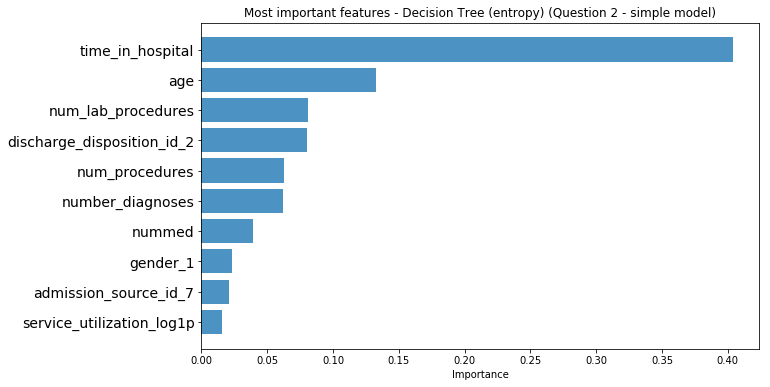

In [105]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy) (Question 2 - simple model)')
plt.show()

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=10))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 90.81%
Dev Set score: 91.02%


In [107]:
Y_dev_predict = dtg.predict(X_dev)

In [108]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10473,795,11268
1,1234,10089,11323
All,11707,10884,22591


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.93
Recall is 0.89
AUC is 0.91


## Random Forest - Question 2 - Simple Model

In [110]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.61%
Dev Set score: 93.58%


In [111]:
Y_dev_predict = forrest.predict(X_dev)

In [112]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11049,219,11268
1,1232,10091,11323
All,12281,10310,22591


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.89
AUC is 0.94


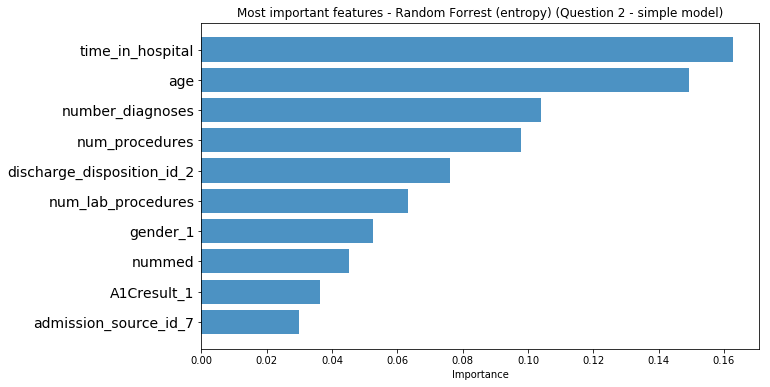

In [114]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forrest (entropy) (Question 2 - simple model)')
plt.show()

In [115]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=27, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 93.93%
Dev Set score: 93.88%


In [116]:
Y_dev_predict = forrest.predict(X_dev)

In [117]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11045,223,11268
1,1159,10164,11323
All,12204,10387,22591


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.94
Precision is 0.98
Recall is 0.90
AUC is 0.94


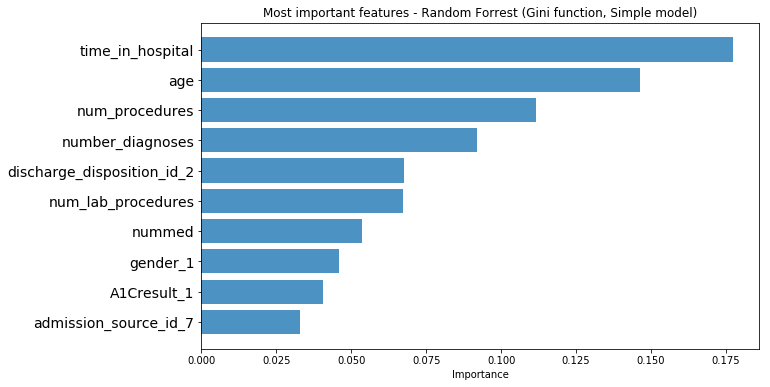

In [119]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forrest (Gini function, Simple model)')
plt.show()

In [120]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

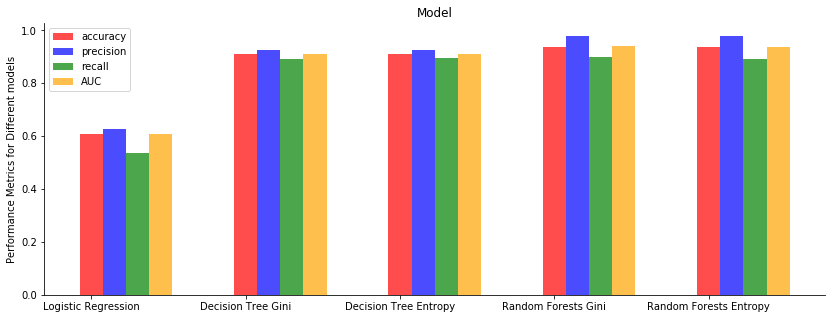

In [121]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()